
# Test random (regressione semplice)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# genero un set di training casuale
X = np.random.randint(0, high=25, size=20)
Y = np.random.randint(5, high=10, size=20)

print(X)
print(Y)

[ 0 16 22  8  3  4 13 11  6  3 24  7  4 10 22 13 17 13 18 10]
[9 5 6 7 9 5 8 6 6 7 6 9 8 8 7 7 7 6 6 9]


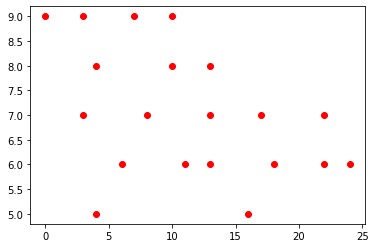

In [ ]:
plt.plot(X, Y, 'ro') #visualizzo i punti su un grafico

In [ ]:
# recupero il valore minimo
xMin = np.mean(X)
yMin = np.mean(Y)

print(xMin)
print(yMin)

11.2
7.05


In [ ]:
# calcolo il valore del coefficente M e B
totallNumeretor = 0
totalDenominator = 0

for i in range(20):
   totallNumeretor += (X[i] - xMin) * (Y[i] - yMin)
   totalDenominator += (X[i] - xMin) ** 2

M = totallNumeretor / totalDenominator
B = yMin - (M * xMin)

print(totallNumeretor)
print(totalDenominator)
print(M)
print(B)

-78.19999999999999
931.2000000000002
-0.08397766323024053
7.990549828178693


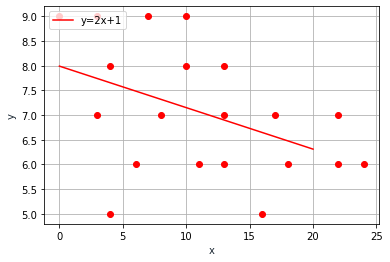

In [ ]:
# visualizzo i punti e la linea generata
xLine = np.linspace(0,20,100)
yLine = M*xLine + B
plt.plot(xLine, yLine, '-r', label='y=2x+1')
plot = plt.plot(X, Y, 'ro')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()

In [ ]:
# eseguo 20 previsioni
yTest = []
xTest = X
for i in range(20):
  yTest.append( (xTest[i] * M) + B)

print(yTest)
print(xTest)

[7.990549828178693, 6.646907216494845, 6.143041237113401, 7.3187285223367695, 7.738616838487972, 7.654639175257731, 6.898840206185566, 7.066795532646047, 7.4866838487972505, 7.738616838487972, 5.97508591065292, 7.402706185567009, 7.654639175257731, 7.150773195876288, 6.143041237113401, 6.898840206185566, 6.562929553264604, 6.898840206185566, 6.478951890034364, 7.150773195876288]
[ 0 16 22  8  3  4 13 11  6  3 24  7  4 10 22 13 17 13 18 10]


In [ ]:
# vedo la probabilità di errore più e bassa meglio è
sumErrN = 0
sumErrD = 0

for i in range(20):
  yPrev = (X[i]*M) + B
  sumErrN += (yPrev - yMin) ** 2
  sumErrD += (Y[i] - yMin) ** 2

print(sumErrN / sumErrD)

0.19930358921410654


# verifica del test con libreria già fatta

In [ ]:
from scipy import stats

In [ ]:
res = stats.linregress(X, Y)

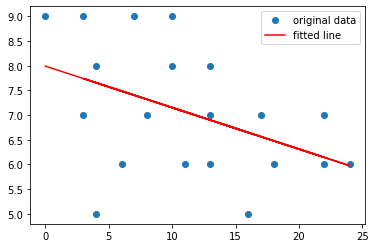

In [ ]:
plt.plot(X, Y, 'o', label='original data')
plt.plot(X, res.intercept + res.slope*X, 'r', label='fitted line')
plt.legend()
plt.show()

# problema reale (regressione multipla)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

files.upload()

Saving carprices.csv to carprices.csv


{'carprices.csv': b'Mileage,Age(yrs),Sell Price($)\n69000,6,18000\n35000,3,34000\n57000,5,26100\n22500,2,40000\n46000,4,31500\n59000,5,26750\n52000,5,32000\n72000,6,19300\n91000,8,12000\n67000,6,22000\n83000,7,18700\n79000,7,19500\n59000,5,26000\n58780,4,27500\n82450,7,19400\n25400,3,35000\n28000,2,35500\n69000,5,19700\n87600,8,12800\n52000,5,28200\n'}

In [ ]:
df = pd.read_csv('carprices.csv')
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


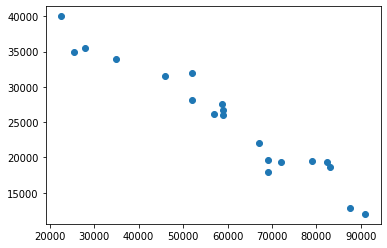

In [ ]:
plt.scatter(df['Mileage'],df['Sell Price($)'])

In [ ]:
x1 = df['Mileage'].to_numpy(dtype=int)
x2 = df['Age(yrs)'].to_numpy(dtype=int)
y = df['Sell Price($)'].to_numpy(dtype=int)
print(x1)
print(x2)
print(y)

xNum = len(x1)
print(xNum)

[69000 35000 57000 22500 46000 59000 52000 72000 91000 67000 83000 79000
 59000 58780 82450 25400 28000 69000 87600 52000]
[6 3 5 2 4 5 5 6 8 6 7 7 5 4 7 3 2 5 8 5]
[18000 34000 26100 40000 31500 26750 32000 19300 12000 22000 18700 19500
 26000 27500 19400 35000 35500 19700 12800 28200]
20


In [ ]:
xMatrix = []
yMatrix = y

for i in range(xNum):
  xMatrix.append([1 , x1[i] , x2[i]])

xMatrix = np.matrix(xMatrix)
print(xMatrix)
print(yMatrix)

[[    1 69000     6]
 [    1 35000     3]
 [    1 57000     5]
 [    1 22500     2]
 [    1 46000     4]
 [    1 59000     5]
 [    1 52000     5]
 [    1 72000     6]
 [    1 91000     8]
 [    1 67000     6]
 [    1 83000     7]
 [    1 79000     7]
 [    1 59000     5]
 [    1 58780     4]
 [    1 82450     7]
 [    1 25400     3]
 [    1 28000     2]
 [    1 69000     5]
 [    1 87600     8]
 [    1 52000     5]]
[18000 34000 26100 40000 31500 26750 32000 19300 12000 22000 18700 19500
 26000 27500 19400 35000 35500 19700 12800 28200]


In [ ]:
xMatrixTransp = xMatrix.transpose()
print(xMatrixTransp)

[[    1     1     1     1     1     1     1     1     1     1     1     1
      1     1     1     1     1     1     1     1]
 [69000 35000 57000 22500 46000 59000 52000 72000 91000 67000 83000 79000
  59000 58780 82450 25400 28000 69000 87600 52000]
 [    6     3     5     2     4     5     5     6     8     6     7     7
      5     4     7     3     2     5     8     5]]


In [ ]:
xFirstPart = np.linalg.inv( np.matmul(xMatrixTransp, xMatrix))
print(xFirstPart)

[[ 4.97694765e-01 -4.38413573e-06 -3.60780274e-02]
 [-4.38413573e-06  1.98799843e-09 -2.22081422e-05]
 [-3.60780274e-02 -2.22081422e-05  2.64604799e-01]]


In [ ]:
xSecondPart =  np.matmul( xMatrixTransp , yMatrix)
print(np.matrix(xSecondPart))

[[     503950 27139110000     2345150]]


In [ ]:
betasArray = []
betaValue = 0

for i in range(len(np.array(xSecondPart)[0]) ):
  for j in range(len(np.array(xFirstPart)[i] )):
     betaValue += np.array(xFirstPart)[i][j] * np.array(xSecondPart)[0][j]
  betasArray.append(betaValue)
  betaValue = 0

print(betasArray)



[47223.34910507643, -0.3383018798060391, -352.792012047139]


# verifica dell'algoritmo appena implementato

In [ ]:
X = df[['Mileage','Age(yrs)']]
Y = df['Sell Price($)']
X.head(10)

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, Y)
print('Coefficients: \n', model.coef_)
print('intercept:', model.intercept_)


Coefficients: 
 [-3.38301880e-01 -3.52792012e+02]
intercept: 47223.349105076486


# regressione in keras

In [2]:
import keras #ML Library
import numpy as np #Mathematics Library
import pandas as pd #Data-handling Library
import matplotlib.pyplot as plt #Used to graph our results

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('drive/My Drive/T.F.2 corso/IowaHousingPrices.csv')
squareFeet = df[['SquareFeet']].values #x value
salePrice = df[['SalePrice']].values #y value
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_shape=(1,)))
model.compile(keras.optimizers.Adam(lr=1), 'mean_squared_error')

model.fit(squareFeet,salePrice, epochs=30, batch_size=10)

history = model.fit(squareFeet,salePrice, epochs=30, batch_size=10)

y_pred = model.predict(squareFeet)
plt.plot(history.history['loss'],'r' )
df.plot(kind='scatter',
       x='SquareFeet',
       y='SalePrice', title='Housing Prices and Square Footage of Iowa Homes')
plt.plot(squareFeet, y_pred, color='red')